# CAPSTONE : PREDICTING LOAN DEFAULT FOR XYZ CORPORATION

# Script by 

Shreyash Upadhyaya - https://www.linkedin.com/in/shreyash24/ \
Rachit Agarwal - https://www.linkedin.com/in/rac05/ \
Vishwesh Deore - https://www.linkedin.com/in/vishweshdeore22/ 

### ABSTRACT

The main income earning assets for a bank are loans. A bank’s profit or a loss depends to a large extent on loans 
i.e. whether the customers are paying back the loan or defaulting. By predicting the loan defaulters, 
the bank can reduce its NonPerforming Loans.
A very important approach in predictive analytics is used to study the problem of predicting loan defaulters.

## IMPORTING LIBRARIES

In [2]:
# libraries used for loading data, data cleaning and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# libraries used for pre-processing

from sklearn.preprocessing import LabelEncoder, StandardScaler



# libraries used for creating models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier


#libraries used for model evaluation

from sklearn.metrics \
import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_curve, auc

# library to calculate the execution time

import time

## EXPLORATORY DATA ANALYSIS(EDA)

### LOADING THE DATA

In [3]:
# importing the data
# low_memory = False --> read all the data at one time

df = pd.read_csv('loan_default.csv', low_memory = False, index_col = 0)
df1 = df.copy()
df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df1.shape

(855969, 72)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 1077501 to 36271262
Data columns (total 72 columns):
member_id                      855969 non-null int64
loan_amnt                      855969 non-null int64
funded_amnt                    855969 non-null int64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan                     855969 non-null object
desc            

In [6]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
member_id,855969.0,3.476269e+07,2.399418e+07,70699.00,10792732.00,36975319.00,5.803559e+07,7.351969e+07
loan_amnt,855969.0,1.474557e+04,8.425340e+03,500.00,8000.00,13000.00,2.000000e+04,3.500000e+04
funded_amnt,855969.0,1.473238e+04,8.419472e+03,500.00,8000.00,13000.00,2.000000e+04,3.500000e+04
funded_amnt_inv,855969.0,1.470006e+04,8.425805e+03,0.00,8000.00,13000.00,2.000000e+04,3.500000e+04
int_rate,855969.0,1.319232e+01,4.368365e+00,5.32,9.99,12.99,1.599000e+01,2.899000e+01
installment,855969.0,4.362381e+02,2.437269e+02,15.69,260.55,382.55,5.715600e+02,1.445460e+03
annual_inc,855969.0,7.507119e+04,6.426447e+04,0.00,45000.00,65000.00,9.000000e+04,9.500000e+06
dti,855969.0,1.812216e+01,1.742363e+01,0.00,11.88,17.61,2.390000e+01,9.999000e+03
delinq_2yrs,855969.0,3.116211e-01,8.571894e-01,0.00,0.00,0.00,0.000000e+00,3.900000e+01
inq_last_6mths,855969.0,6.809148e-01,9.640331e-01,0.00,0.00,0.00,1.000000e+00,8.000000e+00


#  DATA CLEANING

### 1. Renaming the variables

In [7]:
# Renaming the variables

renamed_variables =['member_id','loan_amount','approved_amount_bank','approved_amount_investor','term','interest_rate',
                    'emi','grade','sub_grade','emp_title','emp_length','home_ownership','inc_borrower','verification_status',
                    'issue_date','payment_plan','desc','purpose','title','zip_code','state_code','ratio_inc_exp_borrower',
                    'delinq_2yrs','first_credit','enquires_by_creditors','month_since_last_delinq','months_since_last_record',
                    'open_credit_lines','no._of_negative_factors','revolving_balance','revol_util','total_credit_lines',
                    'initial_loan_type','outstndg_principal_amount','outstndg_principal_amount_investor','total_amount_paid',
                    'total_amount_paid_invt','prncp_amount_recovered','interest_amount_paid','late_fee', 'add_charges',
                    'penalty_fee','last_payment_date','last_amount_paid','next_payment_date', 'credit_report',
                    'collections_within_12months','month_since_last_major_derog','policy_code','application_type',
                    'inc_joint','ratio_inc_exp_joint','verified_status_joint','acc_now_delinq','total_collection',
                    'total_current_bal', 'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','months_since_rcnt_il',
                    'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim',
                    'Inq_fi','total_cu_tl','inq_last_12m','default']

#len(renamed_variables)
df1.columns = renamed_variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 1077501 to 36271262
Data columns (total 72 columns):
member_id                             855969 non-null int64
loan_amount                           855969 non-null int64
approved_amount_bank                  855969 non-null int64
approved_amount_investor              855969 non-null float64
term                                  855969 non-null object
interest_rate                         855969 non-null float64
emi                                   855969 non-null float64
grade                                 855969 non-null object
sub_grade                             855969 non-null object
emp_title                             806526 non-null object
emp_length                            812908 non-null object
home_ownership                        855969 non-null object
inc_borrower                          855969 non-null float64
verification_status                   855969 non-null object
issue_date                

### 2.Extracting the values

In [8]:
# Extracting the values from the string value
# for e.g :- <1 year = 1, 10+ year = 10

# df1['emp_length'].value_counts()
emp_len = {'< 1 year' : '0' , '1 year' : '1', '2 years' : '2', '3 years' : '3', '4 years' : '4', 
           '5 years' : '5','6 years' : '6',
          '7 years' : '7', '8 years' : '8', '9 years' : '9', '10+ years' : '10'}
emp_len

df1['emp_length'] = df1['emp_length'].map(emp_len)
df1['emp_length'].value_counts()

10    282090
2      75986
0      67597
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [9]:
# Extracting the values from the string value
# for e.g :- 36 months = 36

# df1['term'].value_counts()
df1['term'] = df1['term'].map({' 36 months' : '36', ' 60 months' : '60'})
df1['term'].value_counts()

36    600221
60    255748
Name: term, dtype: int64

In [10]:
# converting date columns
# extracting month and year from string format date
# e.g :- '01-01-1985'(dd-mm-yyyy) -- month --> 01
#                                    year --> 1985

date_v = ['first_credit', 'issue_date', 'credit_report', 'last_payment_date', 'next_payment_date']

for i in date_v:
    df1[i] = pd.to_datetime(df1[i], format = '%d-%m-%Y')
    a = i+'_year'
    b = i+'_month'
    df1[a] = pd.DatetimeIndex(df1[i]).year
    df1[b] = pd.DatetimeIndex(df1[i]).month
    
# Dropping the date columns except issue_date column
    
date_v.remove('issue_date')   
df1.drop(date_v, axis = 1, inplace = True)    

### 3. Replacing the values

##### Replacing the inc_borrower and inc_joint on the basis of application type
##### Updating the inc_borrower column with the inc_joint column value where application type = 'JOINT'

##### Replacing the ratio_inc_exp_borrower and ratio_inc_exp_joint on the basis of application type 
##### Updating the ratio_inc_exp_borrower column with the ratio_inc_exp_joint column value where application type = 'JOINT'

In [11]:
a = df1[df1['application_type'] == 'JOINT'].index

for i in a:
    df1.loc[i, 'inc_borrower'] = df1.loc[i]['inc_joint']
    df1.loc[i,'ratio_inc_exp_borrower'] = df1.loc[i]['ratio_inc_exp_joint']
    #print(i,'',df1.loc[i]['inc_joint'],'',df1.loc[i]['inc_borrower'])
    
# Dropping the original columns

df1.drop(['inc_joint', 'ratio_inc_exp_joint'], axis = 1, inplace = True)
df1.shape

(855969, 76)

In [12]:
df1['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

#### Replacing the values in home_ownership 
#### e.g:- replacing other,any,none value with'other' value

In [13]:
a = df1[(df1['home_ownership'] == 'OTHER') | (df1['home_ownership'] == 'NONE') | (df1['home_ownership'] == 'ANY')].index

for i in a:
    df1.loc[i, 'home_ownership'] = 'OTHER'
    
df1['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          192
Name: home_ownership, dtype: int64

# PRE-PROCESSING DATA

### 1.Dropping the Variables

##### Dropping the variables which are not necessary for the model

In [14]:
# Dropping the following varibales

# member_id -> Every value is unique
# emp_title, desc,title,zip_code,sub_grade -> Not needed for model analysis 
# policy_code -> Every value is 1

drop_var = ['member_id','emp_title','desc','title','zip_code','policy_code']
df1.drop(drop_var, axis = 1, inplace = True)
df1.shape

(855969, 70)

#### Dropping those variables which contain more than 50% of null values

In [15]:
a = df1.isnull().sum().sort_values(ascending = True)/len(df1)
b = a[a > 0.5].index
print(b)

Index(['month_since_last_delinq', 'month_since_last_major_derog',
       'months_since_last_record', 'max_bal_bc', 'Inq_fi', 'total_cu_tl',
       'inq_last_12m', 'open_rv_24m', 'open_rv_12m', 'total_bal_il',
       'open_il_24m', 'open_il_12m', 'open_acc_6m', 'all_util', 'open_il_6m',
       'months_since_rcnt_il', 'il_util', 'verified_status_joint'],
      dtype='object')


In [16]:
df1 = df1.drop(b, axis = 1)
a1 = df1.isnull().sum().sort_values(ascending = False)
a1[a1 > 0]

next_payment_date_month        252971
next_payment_date_year         252971
total_rev_hi_lim                67313
total_current_bal               67313
total_collection                67313
emp_length                      43061
last_payment_date_month          8862
last_payment_date_year           8862
revol_util                        446
collections_within_12months        56
credit_report_month                50
credit_report_year                 50
dtype: int64

### 2. Computing the missing values

#### Imputing the  missing null values with zero

In [17]:
for i in a1.index:
    df1.fillna(0, inplace  = True)
    
df1.isnull().sum()

loan_amount                           0
approved_amount_bank                  0
approved_amount_investor              0
term                                  0
interest_rate                         0
emi                                   0
grade                                 0
sub_grade                             0
emp_length                            0
home_ownership                        0
inc_borrower                          0
verification_status                   0
issue_date                            0
payment_plan                          0
purpose                               0
state_code                            0
ratio_inc_exp_borrower                0
delinq_2yrs                           0
enquires_by_creditors                 0
open_credit_lines                     0
no._of_negative_factors               0
revolving_balance                     0
revol_util                            0
total_credit_lines                    0
initial_loan_type                     0


### 3. Converting the datatypes of 'object' to 'int'

In [18]:
l = ['term', 'emp_length', 'credit_report_month', 'credit_report_year', 'last_payment_date_month',
     'last_payment_date_year', 'next_payment_date_month','next_payment_date_year']
for i in l:
    df1[i] = df1[i].astype('int')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 1077501 to 36271262
Data columns (total 52 columns):
loan_amount                           855969 non-null int64
approved_amount_bank                  855969 non-null int64
approved_amount_investor              855969 non-null float64
term                                  855969 non-null int32
interest_rate                         855969 non-null float64
emi                                   855969 non-null float64
grade                                 855969 non-null object
sub_grade                             855969 non-null object
emp_length                            855969 non-null int32
home_ownership                        855969 non-null object
inc_borrower                          855969 non-null float64
verification_status                   855969 non-null object
issue_date                            855969 non-null datetime64[ns]
payment_plan                          855969 non-null object
purpose            

### 4. Checking for multicollinearity

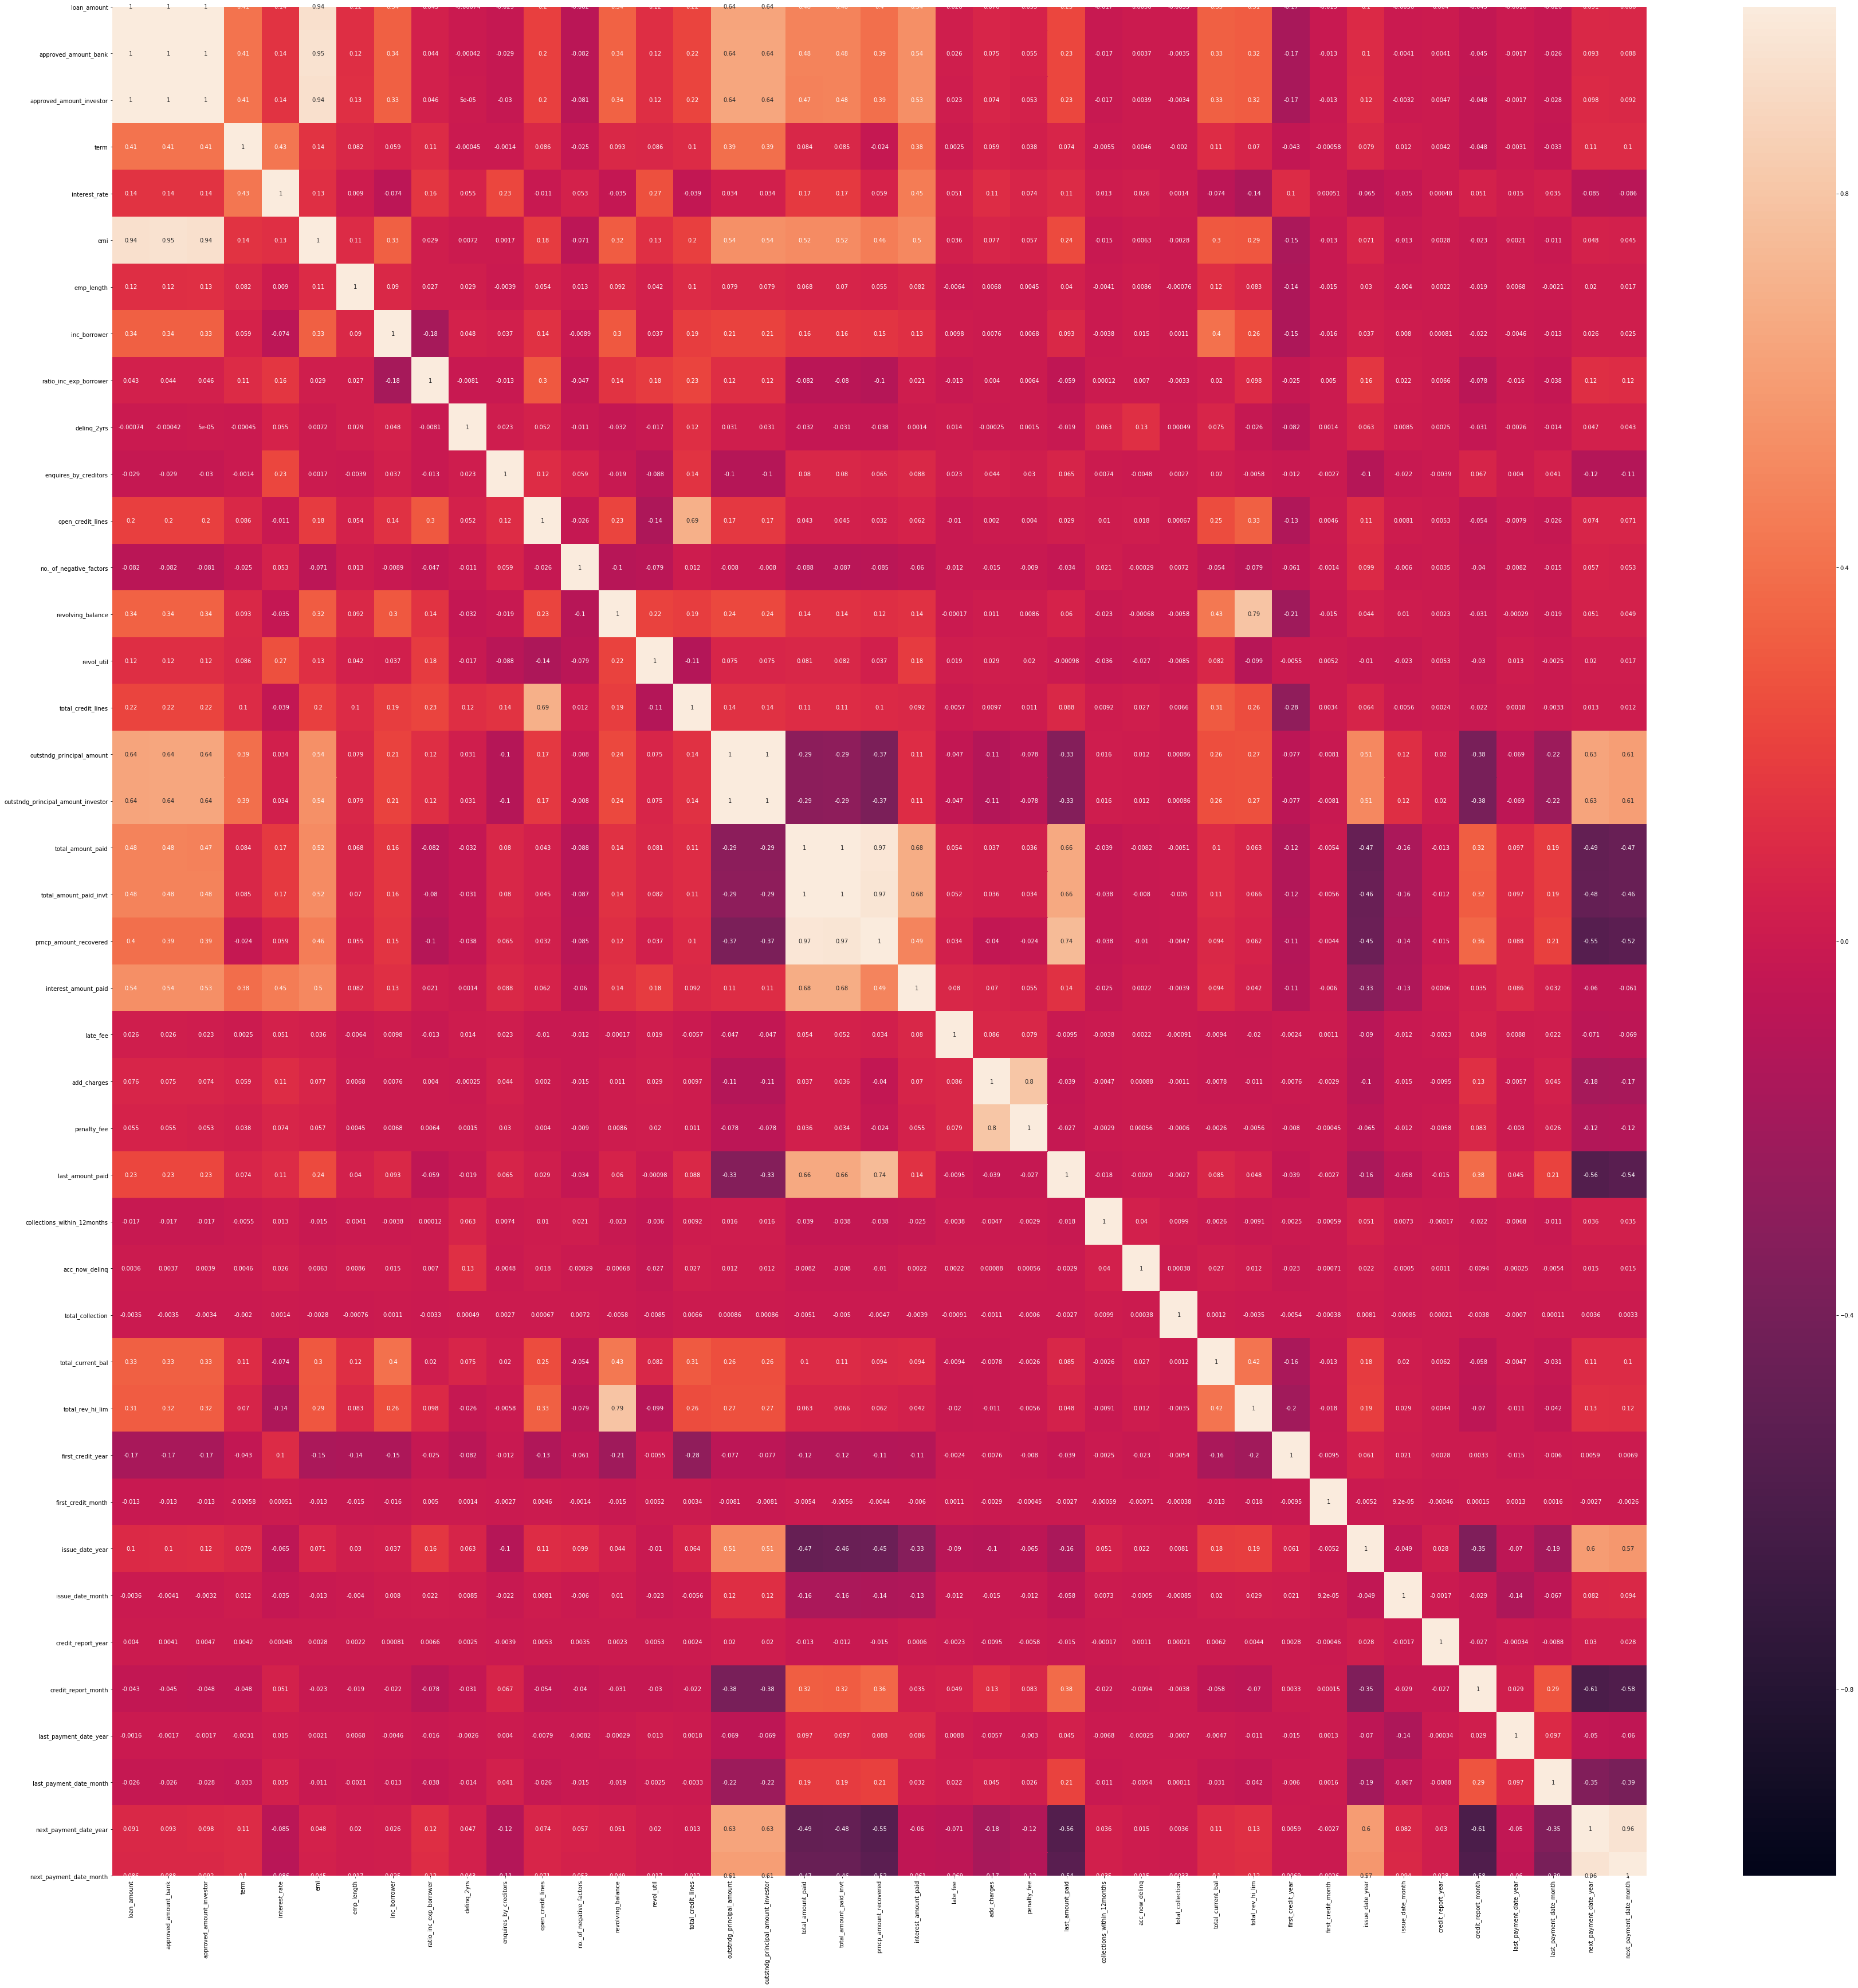

In [20]:
X = df1.drop('default', axis = 1).corr()


plt.figure(figsize = (60,60))
sns.heatmap(X, vmin = -1.0, vmax = 1.0, annot = True)

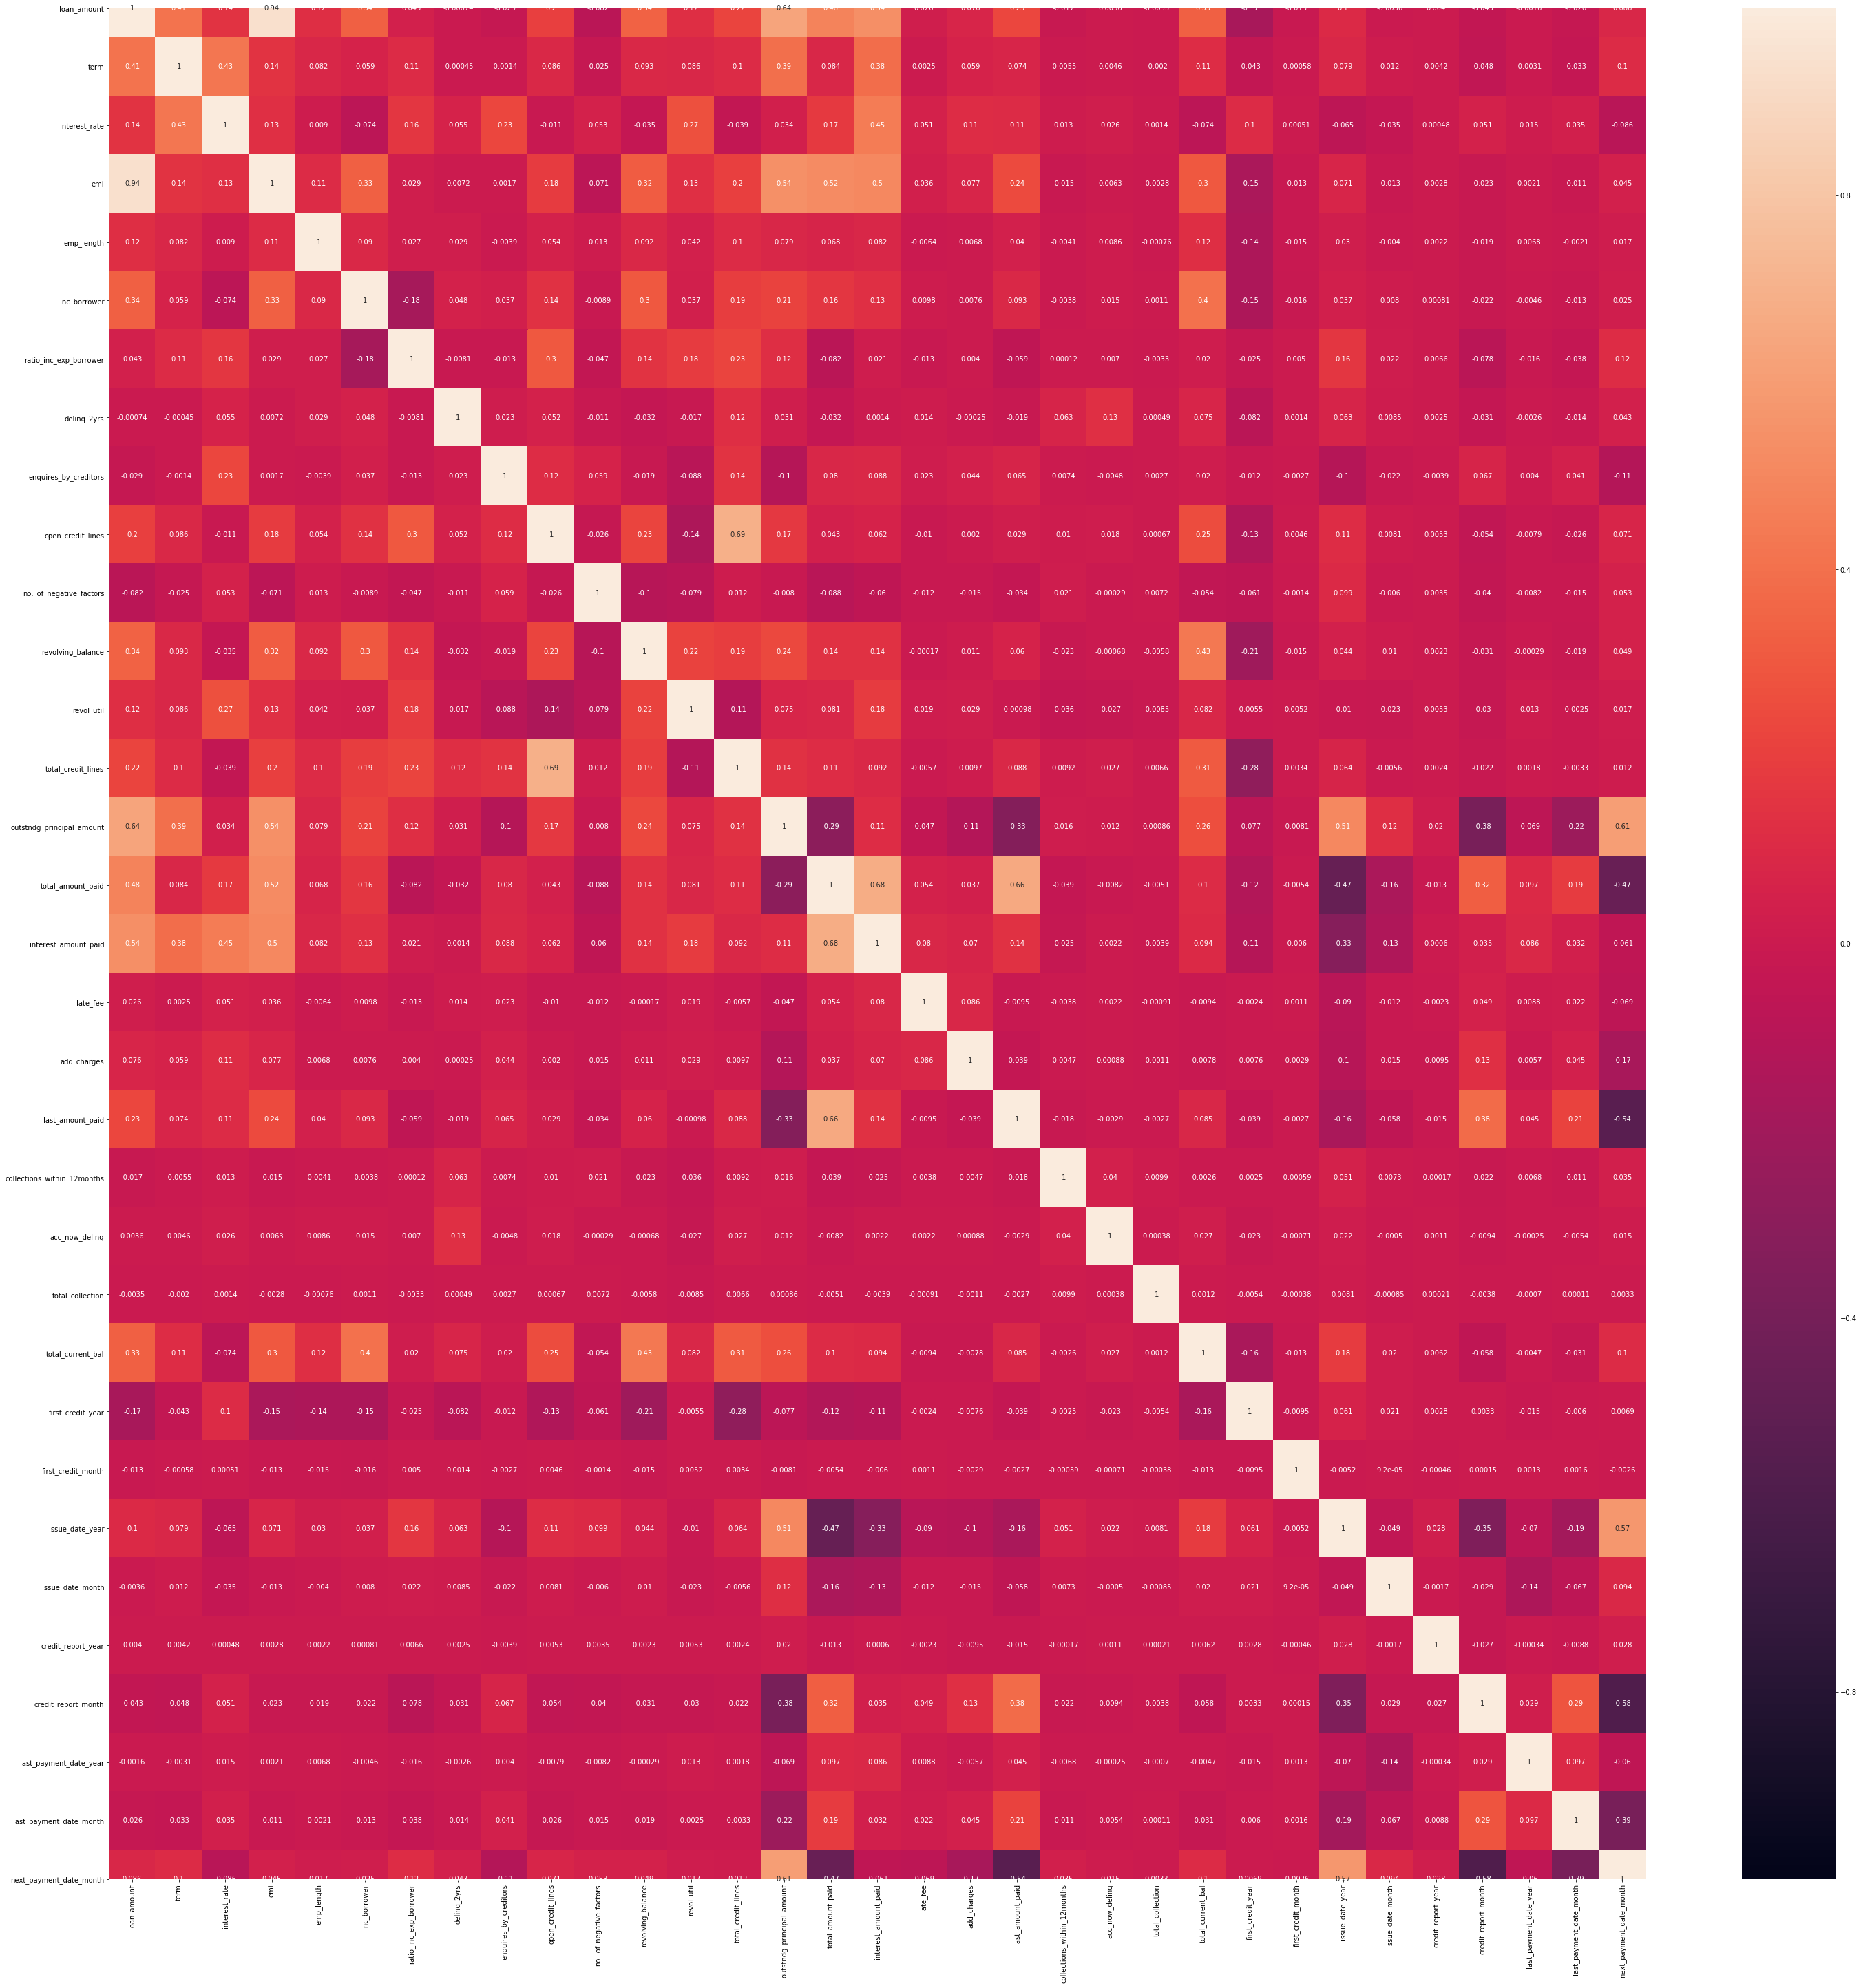

In [21]:
# Removing the varibales with value > 0.7
# having high multicollinearity

var_drop = ['approved_amount_bank','approved_amount_investor','outstndg_principal_amount_investor','total_amount_paid_invt',
            'prncp_amount_recovered','next_payment_date_year','penalty_fee', 'total_rev_hi_lim']

df1.drop(var_drop, axis = 1, inplace = True)
X = df1.drop('default', axis = 1).corr()
plt.figure(figsize = (50,50))
sns.heatmap(X, vmin = -1.0, vmax = 1.0, annot = True)

In [22]:
df1.shape

(855969, 44)

### 5. Rearranging the columns

In [23]:
l = ['loan_amount', 'term', 'interest_rate', 'emi', 'grade', 'sub_grade',
     'emp_length', 'home_ownership', 'inc_borrower', 'verification_status',
     'issue_date', 'payment_plan', 'purpose', 'state_code',
     'ratio_inc_exp_borrower', 'delinq_2yrs', 'enquires_by_creditors',
     'open_credit_lines', 'no._of_negative_factors', 'revolving_balance',
     'revol_util', 'total_credit_lines', 'initial_loan_type',
     'outstndg_principal_amount', 'total_amount_paid',
     'interest_amount_paid', 'late_fee', 'add_charges', 'last_amount_paid',
     'collections_within_12months', 'application_type', 'acc_now_delinq',
     'total_collection', 'total_current_bal',
     'first_credit_month', 'first_credit_year', 'issue_date_month',
     'issue_date_year', 'credit_report_month', 'credit_report_year',
     'last_payment_date_month', 'last_payment_date_year',
     'next_payment_date_month','default']

df2 = df1[l]
df2.head()

,loan_amount,term,interest_rate,emi,grade,sub_grade,emp_length,home_ownership,inc_borrower,verification_status,...,first_credit_month,first_credit_year,issue_date_month,issue_date_year,credit_report_month,credit_report_year,last_payment_date_month,last_payment_date_year,next_payment_date_month,default
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,...,1,1985,12,2011,1,2016,1,2015,0,0
1077430,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,4,1999,12,2011,9,2013,4,2013,0,1
1077175,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,11,2001,12,2011,1,2016,6,2014,0,0
1076863,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,2,1996,12,2011,1,2015,1,2015,0,0
1075358,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,...,1,1996,12,2011,1,2016,1,2016,2,0


In [24]:
df2.shape

(855969, 44)

In [25]:
df2.to_csv('New_processed_data.csv')

### 6. Label Encoder

In [26]:
# Extracting the columns where datatype = object

col = []
for i in df2.columns[:-1]:
    if df2[i].dtype == 'object':
        col.append(i)
        
col    

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'payment_plan',
 'purpose',
 'state_code',
 'initial_loan_type',
 'application_type']

In [27]:
# converting categorical variables to numeric variables

from sklearn.preprocessing import LabelEncoder

label_enco = LabelEncoder()

for i in col:
    label_enco.fit(df2[i])
    df2[i] = label_enco.transform(df2[i])
    
df2.head()

,loan_amount,term,interest_rate,emi,grade,sub_grade,emp_length,home_ownership,inc_borrower,verification_status,...,first_credit_month,first_credit_year,issue_date_month,issue_date_year,credit_report_month,credit_report_year,last_payment_date_month,last_payment_date_year,next_payment_date_month,default
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,36,10.65,162.87,1,6,10,3,24000.0,2,...,1,1985,12,2011,1,2016,1,2015,0,0
1077430,2500,60,15.27,59.83,2,13,0,3,30000.0,1,...,4,1999,12,2011,9,2013,4,2013,0,1
1077175,2400,36,15.96,84.33,2,14,10,3,12252.0,0,...,11,2001,12,2011,1,2016,6,2014,0,0
1076863,10000,36,13.49,339.31,2,10,10,3,49200.0,1,...,2,1996,12,2011,1,2015,1,2015,0,0
1075358,3000,60,12.69,67.79,1,9,1,3,80000.0,1,...,1,1996,12,2011,1,2016,1,2016,2,0


### 7. Train Test Split

In [28]:
# splitting the data into train test on issue_date variable
# training data = June 2007 to May 2015
# training data = June 2015 to Dec 2015


train = df2[(df2['issue_date'] >= '2007-06-01') & (df2['issue_date'] <= '2015-05-01')]
test = df2[(df2['issue_date'] >= '2015-06-01') & (df2['issue_date'] <= '2015-12-01')]

In [29]:
# Dropping issue_date variable

drop_var = ['issue_date','issue_date_year', 'sub_grade',
            'first_credit_year', 'credit_report_year', 
            'last_payment_date_year']

train1 = train.drop(drop_var, axis = 1)
test1 = test.drop(drop_var, axis = 1)

In [30]:
X_train = train1.values[:,:-1]
Y_train = train1.values[:,-1]
Y_train = Y_train.astype('int')

X_test = test1.values[:,:-1]
Y_test = test1.values[:,-1]
Y_test = Y_test.astype('int')

In [31]:
train1.shape

(598978, 38)

In [32]:
test1.shape

(256991, 38)

### 8. Standard Scaler

In [33]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# MODELS AND EVALUATION

In [34]:
def metric(actual_values, predicted_values):
    l= []
    
    # Confusion matrix 
    cfm = confusion_matrix(actual_values,predicted_values)
    print(cfm)
    
    # Classification Report
    print('\nClassification Report\n',classification_report(actual_values,predicted_values))
    
    
    # Accuracy Score
    acc = round(accuracy_score(actual_values,predicted_values),4)
    l.append(acc)
    print('\nAccuracy of Model :',acc)
          
    
    # Precision value of class 1
    pr_val = round(precision_score(actual_values,predicted_values),4)
    l.append(pr_val)
          
      
    # Recall value of class 1
    rc_vl = round(recall_score(actual_values,predicted_values),4)
    l.append(rc_vl)      
   
          
    # F1 score of class 1
    f1_sc = round(f1_score(actual_values,predicted_values),4)
    l.append(f1_sc)  
          
    
    # Value of Type 1 Error      
    l.append(cfm[0,1])      
          
          
    # Value of Type II Error      
    l.append(cfm[1,0])
          
          
    # Total Error value     
    l.append(cfm[0,1] + cfm[1,0])  
             
   
    return l        

In [35]:
result = pd.DataFrame(columns = ['Algorithm','Overall Accuracy','Precision Value','Recall Value','F1-Score',
                                 'Type I Error','Type II Error', 'Total Error'])

result['Algorithm'] = ['Logistic Regression','Adjusted Logistic Regression', 'Decision Tree', 'Tuned Decision Tree',
                       'Bagging', 'AdaBoost', 'ANN MLP Classifier', 'Voting Classifier']

result.set_index('Algorithm', inplace = True)

# result.head(7)

In [36]:
prediction = pd.DataFrame()
prediction['Actual Values'] = Y_test
prediction.head()

,Actual Values
0,0
1,0
2,0
3,0
4,0


## LOGISTIC REGRESSION

In [37]:
execution_time = []
start = time.time()

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

end = time.time()
print('Execution Time',round((end-start)/60,4),'secs')
execution_time.append(round((end-start)/60,4))

Execution Time 0.4668 secs


#### Prediction on Testing Data

In [38]:
Y_pred = logistic.predict(X_test)
l = metric(Y_test, Y_pred)

j = 0
for i in result.columns:
    result.loc['Logistic Regression',i] = l[j]
    j += 1
    
prediction['Logistic Regression'] = Y_pred

[[256592     88]
 [    63    248]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.74      0.80      0.77       311

    accuracy                           1.00    256991
   macro avg       0.87      0.90      0.88    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 0.9994


## ADJUSTED LOGISTIC REGRESSION

In [39]:
Y_pred_prob = logistic.predict_proba(X_test)
#print(Y_pred_prob)

for a in np.arange(0.4,0.91,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    
    #cfm[0,1] -> False Positive -> Type I error 
    #cfm[1,0] -> False Negative -> Type II error
    
    
    total_err = cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 225  , type 2 error : 63  , type 1 error: 162
Errors at threshold  0.41000000000000003 : 218  , type 2 error : 63  , type 1 error: 155
Errors at threshold  0.42000000000000004 : 214  , type 2 error : 63  , type 1 error: 151
Errors at threshold  0.43000000000000005 : 211  , type 2 error : 63  , type 1 error: 148
Errors at threshold  0.44000000000000006 : 202  , type 2 error : 63  , type 1 error: 139
Errors at threshold  0.45000000000000007 : 191  , type 2 error : 63  , type 1 error: 128
Errors at threshold  0.4600000000000001 : 180  , type 2 error : 63  , type 1 error: 117
Errors at threshold  0.4700000000000001 : 178  , type 2 error : 63  , type 1 error: 115
Errors at threshold  0.4800000000000001 : 170  , type 2 error : 63  , type 1 error: 107
Errors at threshold  0.4900000000000001 : 161  , type 2 error : 63  , type 1 error: 98
Errors at threshold  0.5000000000000001 : 151  , type 2 error : 63  , type 1 error: 88
Errors at threshold  0.5100000000000001 : 14

#### Prediction on Testing data

In [40]:
# Setting the threshold to 0.7

Y_pred_class = []

for v in Y_pred_prob[:,1]:
    if v > 0.7:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
    
execution_time.append(round((end-start)/60,4))

In [41]:
l = metric(Y_test, Y_pred_class)

j = 0
for i in result.columns:
    result.loc['Adjusted Logistic Regression',i] = l[j]
    j += 1
    
prediction['Adjusted Logistic Regression'] = Y_pred_class

[[256647     33]
 [    66    245]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.88      0.79      0.83       311

    accuracy                           1.00    256991
   macro avg       0.94      0.89      0.92    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 0.9996


## DECISION TREE

In [42]:
start = time.time()

decision_tree = DecisionTreeClassifier(criterion = 'gini',random_state = 10)
decision_tree.fit(X_train, Y_train)

end = time.time()
print('Execution Time',round((end-start)/60,4),'secs')
execution_time.append(round((end-start)/60,4))

Execution Time 0.4007 secs


#### Prediction on Testing data

In [43]:
Y_pred_dt = decision_tree.predict(X_test)
l = metric(Y_test, Y_pred_dt)

j = 0
for i in result.columns:
    result.loc['Decision Tree',i] = l[j]
    j += 1
    
prediction['Decision Tree'] = Y_pred_dt

[[251878   4802]
 [    10    301]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.06      0.97      0.11       311

    accuracy                           0.98    256991
   macro avg       0.53      0.97      0.55    256991
weighted avg       1.00      0.98      0.99    256991


Accuracy of Model : 0.9813


## TUNED DECISION TREE

In [44]:
start = time.time()

tunned_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, min_samples_leaf = 5, random_state = 10)
tunned_tree.fit(X_train, Y_train)

end = time.time()
print('Execution Time',round((end-start)/60,4),'secs')
execution_time.append(round((end-start)/60,4))

Execution Time 0.2807 secs


#### Prediction on Testing data

In [45]:
Y_pred_tun = tunned_tree.predict(X_test)
l = metric(Y_test, Y_pred_tun)

j = 0
for i in result.columns:
    result.loc['Tuned Decision Tree',i] = l[j]
    j += 1
    
prediction['Tunned Decision Tree'] = Y_pred_tun

[[256670     10]
 [    11    300]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.97      0.96      0.97       311

    accuracy                           1.00    256991
   macro avg       0.98      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 0.9999


#### Prediction on Training data

In [46]:
Y_pred_tun_train = tunned_tree.predict(X_train)
l = metric(Y_train, Y_pred_tun_train)

[[552513    309]
 [  1566  44590]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       0.99      0.97      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 0.9969


# BAGGING ALOGIRTHM

In [47]:
start = time.time()

bagging = ExtraTreesClassifier(n_estimators = 50, random_state = 10)
bagging.fit(X_train, Y_train)

end = time.time()
print('Execution Time',round((end-start)/60,4),'secs')
execution_time.append(round((end-start)/60,4))

Execution Time 1.7848 secs


#### Prediction on Testing data

In [48]:
Y_pred_bag = bagging.predict(X_test)
l = metric(Y_test, Y_pred_bag)

j = 0
for i in result.columns:
    result.loc['Bagging',i] = l[j]
    j += 1
    
prediction['Bagging'] = Y_pred_bag

[[256680      0]
 [    11    300]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.96      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 1.0


#### Prediction on Training data

In [49]:
Y_pred_bag_train = bagging.predict(X_train)
l = metric(Y_train, Y_pred_bag_train)

[[552822      0]
 [     0  46156]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 1.0


# BOOSTING ALOGIRTHM

## ADABOOST CLASSIFIER USING BAGGING

In [50]:
start = time.time()

ada_boost = AdaBoostClassifier(base_estimator = ExtraTreesClassifier(n_estimators = 50, random_state = 10),
                              n_estimators = 10, random_state = 10)
ada_boost.fit(X_train, Y_train)

end = time.time()
print('Execution Time',round((end-start)/60,4),'secs')
execution_time.append(round((end-start)/60,4))

Execution Time 2.7811 secs


#### Prediction on Testing data

In [51]:
Y_pred_ada = ada_boost.predict(X_test)
l = metric(Y_test, Y_pred_ada)

j = 0
for i in result.columns:
    result.loc['AdaBoost',i] = l[j]
    j += 1
    
prediction['AdaBoost'] = Y_pred_ada

[[256680      0]
 [    10    301]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 1.0


#### Prediction on Training data

In [52]:
Y_pred_ada_train = ada_boost.predict(X_train)
l = metric(Y_train, Y_pred_ada_train)

[[552822      0]
 [     0  46156]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 1.0


## ANN MLP CLASSIFIER

In [53]:
start = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(45,20,15),max_iter=100, early_stopping=True,
                    random_state=10, activation="logistic", solver="adam",learning_rate="adaptive",
                    learning_rate_init=0.01,verbose=True,n_iter_no_change=5)


mlp.fit(X_train,Y_train)

end = time.time()
print('Execution Time',round((end-start)/60,4),'secs')
execution_time.append(round((end-start)/60,4))

Iteration 1, loss = 0.03065432
Validation score: 0.995960
Iteration 2, loss = 0.01007109
Validation score: 0.998898
Iteration 3, loss = 0.00651379
Validation score: 0.998681
Iteration 4, loss = 0.00605696
Validation score: 0.999032
Iteration 5, loss = 0.00561443
Validation score: 0.999232
Iteration 6, loss = 0.00532851
Validation score: 0.999215
Iteration 7, loss = 0.00523921
Validation score: 0.999115
Iteration 8, loss = 0.00516481
Validation score: 0.999015
Iteration 9, loss = 0.00487586
Validation score: 0.999215
Iteration 10, loss = 0.00487146
Validation score: 0.998714
Iteration 11, loss = 0.00476024
Validation score: 0.999249
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
Execution Time 1.4602 secs


#### Prediction on Testing data

In [54]:
Y_pred_mlp = mlp.predict(X_test)
l = metric(Y_test,Y_pred_mlp)

j = 0
for i in result.columns:
    result.loc['ANN MLP Classifier',i] = l[j]
    j += 1
    
prediction['ANN MLP Clasifier'] = Y_pred_mlp

[[256669     11]
 [    11    300]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.96      0.96      0.96       311

    accuracy                           1.00    256991
   macro avg       0.98      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 0.9999


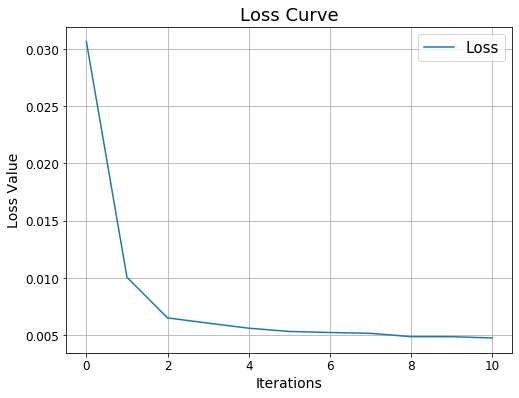

In [55]:
plt.figure(figsize = (8,6))
plt.title('Loss Curve', fontsize = 18)
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Loss Value', fontsize = 14)
plt.legend(['Loss'], fontsize = 15)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.show()

#### Prediction on Training data

In [56]:
Y_pred_mlp_train = mlp.predict(X_train)
l = metric(Y_train,Y_pred_mlp_train)

[[552771     51]
 [   354  45802]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.99      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 0.9993


## VOTING CLASSIFIER

In [57]:
start = time.time()

estimators = []

tuned_decision = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, min_samples_leaf = 5, random_state = 10)
estimators.append(('Tuned Decision Tree',tuned_decision))

bagging = ExtraTreesClassifier(n_estimators = 50, random_state = 10)
estimators.append(('Bagging',bagging))


ada_boost = AdaBoostClassifier(base_estimator = ExtraTreesClassifier(n_estimators = 50, random_state = 10),
                              n_estimators = 10, random_state = 10)
estimators.append(('AdaBoost', ada_boost))


vot_class = VotingClassifier(estimators)
vot_class.fit(X_train,Y_train)

end = time.time()
print('Execution Time',round((end-start)/60,4),'secs')
execution_time.append(round((end-start)/60,4))

Execution Time 5.0708 secs


#### Prediction on Testing data

In [58]:
Y_pred_vot_cl = vot_class.predict(X_test)
l = metric(Y_test,Y_pred_vot_cl)

j = 0
for i in result.columns:
    result.loc['Voting Classifier',i] = l[j]
    j += 1
    
prediction['Voting Classifier'] = Y_pred_vot_cl

[[256680      0]
 [    10    301]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 1.0


#### Prediction on Training data

In [59]:
Y_pred_votcl_train = vot_class.predict(X_train)
l = metric(Y_train,Y_pred_votcl_train)

[[552822      0]
 [     0  46156]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 1.0


In [60]:
prediction.head()

,Actual Values,Logistic Regression,Adjusted Logistic Regression,Decision Tree,Tunned Decision Tree,Bagging,AdaBoost,ANN MLP Clasifier,Voting Classifier
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


# AUC - ROC CURVE

### Calculating fpr, tpr and auc_value

In [61]:
fpr = []
tpr = []
auc_value = []

for i in prediction.columns[1:]:
    f,t,z = roc_curve(prediction['Actual Values'], prediction[i])
    a = round(auc(f,t),6)
    fpr.append(f)
    tpr.append(t)
    auc_value.append(a)

In [62]:
auc_val = [round(i*100,2) for i in auc_value]
auc_val = list(map("{}%".format, auc_val))


result['AUC_value'] = auc_val
result['AUC_value'].head(8)

Algorithm
Logistic Regression             89.85%
Adjusted Logistic Regression    89.38%
Decision Tree                   97.46%
Tuned Decision Tree             98.23%
Bagging                         98.23%
AdaBoost                        98.39%
ANN MLP Classifier              98.23%
Voting Classifier               98.39%
Name: AUC_value, dtype: object

## Plotting the AUC - ROC CURVE

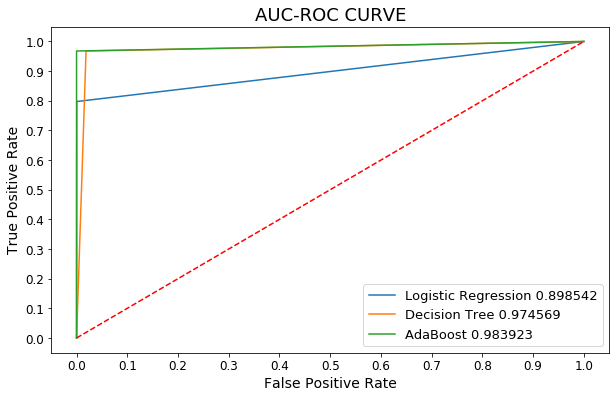

In [63]:
plt.figure(figsize = (10,6))
plt.title('AUC-ROC CURVE', fontsize = 18)
# cl = list(prediction.columns[1:])

# for i in range(len(cl)):
#    la = cl[i]+' '+str(auc_value[i])
#    plt.plot(fpr[i],tpr[i], label = la)
#    print(la)

plt.plot(fpr[0],tpr[0], label = str('Logistic Regression'+' '+str(auc_value[0])))
plt.plot(fpr[2],tpr[2], label = str('Decision Tree'+' '+str(auc_value[2])))
plt.plot(fpr[5],tpr[5], label = str('AdaBoost'+' '+str(auc_value[5])))




plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 0, fontsize = 13)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)

plt.xticks(np.arange(0,1.1,0.1), fontsize = 12)
plt.yticks(np.arange(0,1.1,0.1), fontsize = 12)

plt.show()

###  EXECUTION TIME CALCULATED ON MODELS

In [65]:
exec_time = list(map("{} mins".format, execution_time))
result['Execution Time'] = exec_time

In [66]:
result.head(8)

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error,AUC_value,Execution Time
Algorithm,,,,,,,,,
Logistic Regression,0.9994,0.7381,0.7974,0.7666,88,63,151,89.85%,0.4668 mins
Adjusted Logistic Regression,0.9996,0.8813,0.7878,0.8319,33,66,99,89.38%,0.4668 mins
Decision Tree,0.9813,0.059,0.9678,0.1112,4802,10,4812,97.46%,0.4007 mins
Tuned Decision Tree,0.9999,0.9677,0.9646,0.9662,10,11,21,98.23%,0.2807 mins
Bagging,1,1,0.9646,0.982,0,11,11,98.23%,1.7848 mins
AdaBoost,1,1,0.9678,0.9837,0,10,10,98.39%,2.7811 mins
ANN MLP Classifier,0.9999,0.9646,0.9646,0.9646,11,11,22,98.23%,1.4602 mins
Voting Classifier,1,1,0.9678,0.9837,0,10,10,98.39%,5.0708 mins


In [67]:
# Saving the result file to csv format

result.to_csv('Final Result.csv')

## Predicted the test values on basis of AdaBoost Classifier Model

In [68]:
test1.drop('default', axis  = 1, inplace = True)
test1['Default_predictions'] = Y_pred_ada
test1['Default_predictions'] = test1['Default_predictions'].map({0 : 'No', 1 : "Yes"})

In [69]:
test1.head()

,loan_amount,term,interest_rate,emi,grade,emp_length,home_ownership,inc_borrower,verification_status,payment_plan,...,application_type,acc_now_delinq,total_collection,total_current_bal,first_credit_month,issue_date_month,credit_report_month,last_payment_date_month,next_payment_date_month,Default_predictions
id,,,,,,,,,,,,,,,,,,,,,
68587652,25000,36,5.32,752.87,0,1,0,150000.0,0,0,...,0,0,0.0,430856.0,2,12,1,1,2,No
66624733,18000,60,19.48,471.70,4,7,3,150000.0,0,0,...,0,0,60.0,36247.0,6,12,1,1,2,No
68446769,7000,36,7.49,217.72,0,10,0,59000.0,0,0,...,0,0,0.0,55222.0,10,12,1,0,2,No
68595206,20000,36,17.97,722.75,3,7,0,180000.0,0,0,...,0,0,418.0,277227.0,4,12,1,0,2,No
68587491,15000,36,6.99,463.09,0,2,0,93000.0,0,0,...,0,0,0.0,306430.0,10,12,1,0,2,No


In [70]:
test1.to_csv('Loan Default Prediction.csv')